In [1]:
import numpy as np
import pandas as pd
import anndata as ad
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import sparse
import seaborn as sns

In [2]:
from liana.method.sp._misty import plot_distance_weights, plot_neighbors
from liana.method.sp._misty import _get_paraview_groups, _get_juxtaview_groups

In [3]:
# random arangement of 100 cells
np.random.seed(42)
coords = pd.DataFrame(np.random.uniform(low=0, high=10, size=(10, 2)), columns=["x", "y"])

In [4]:
# hexgonal grid with 100 cells
y, x = np.meshgrid(np.arange(0, 10, 1), np.arange(0, 10, 1))
coords = pd.DataFrame({"x": x.flatten(), "y": y.flatten()})
coords.y[coords.x % 2 == 0] += 0.5
coords

,x,y
0,0,0.5
1,0,1.5
2,0,2.5
3,0,3.5
4,0,4.5
...,...,...
95,9,5.0
96,9,6.0
97,9,7.0
98,9,8.0


In [5]:
# assign features
f1 = lambda y: (y < 5).astype(float)
f2 = lambda y: (y > 5).astype(float)

# assing cell types
c = lambda x: ((x > 4)+1).astype(str)

In [6]:
X = np.stack([f1(coords.y), f2(coords.y)], axis=1)
X = sparse.csr_matrix(X)
X.shape

(100, 2)

In [7]:
adata = ad.AnnData(X=X, var=pd.DataFrame({"feature": ["f1", "f2"]}).set_index("feature"))
adata.obsm["spatial"] = coords.values
adata.obs["cluster"] = c(adata.obsm["spatial"][:, 0])
adata

AnnData object with n_obs × n_vars = 100 × 2
    obs: 'cluster'
    obsm: 'spatial'

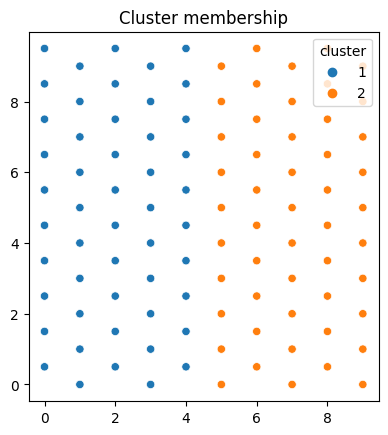

In [8]:
sns.scatterplot(x=adata.obsm["spatial"][:, 0], y=adata.obsm["spatial"][:, 1], hue=adata.obs["cluster"])
plt.gca().set_aspect('equal')
plt.title("Cluster membership")
plt.show()

### Test grouped views

In [9]:
paraview_grouped = _get_paraview_groups(adata, bandwidth=2, group_env_by="cluster", kernel="gaussian", add_self=True, spatial_key="spatial", predictors=adata.var_names)
juxtaview_groups = _get_juxtaview_groups(adata, group_env_by="cluster", add_self=True, spatial_key="spatial", predictors=adata.var_names)

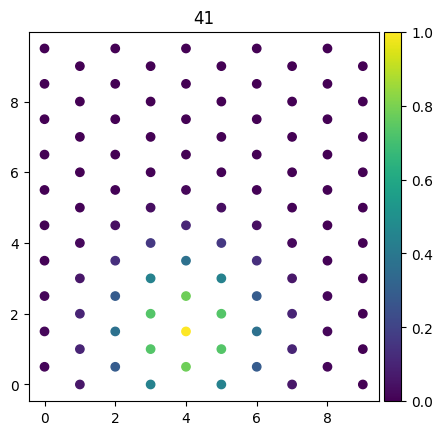

In [10]:
plot_distance_weights(adata, bandwidth=2, cells=[41])

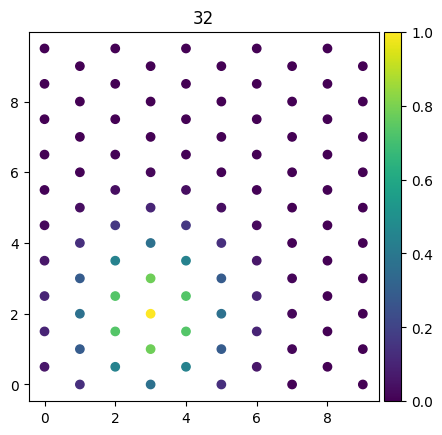

In [11]:
plot_distance_weights(adata, bandwidth=2, cells=[32])

As expected cell 32 should have a larger value paraview compared to cell 41, because cell 41 lays at the edge of cluster 1 from which this paraview is constructed.

In [12]:
print(paraview_grouped["1"].X.todense()[32, 0])
print(paraview_grouped["1"].X.todense()[41, 0])

9.873091861052876
7.055591686371052


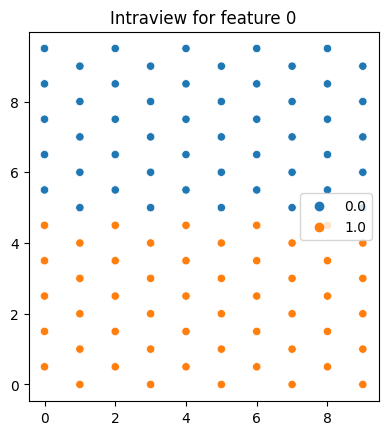

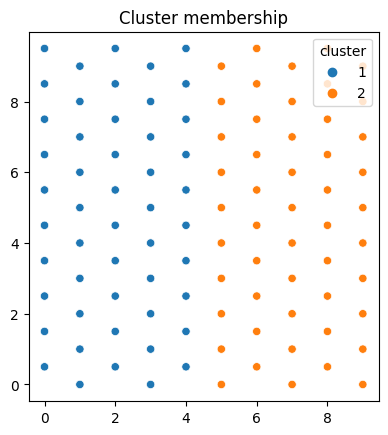

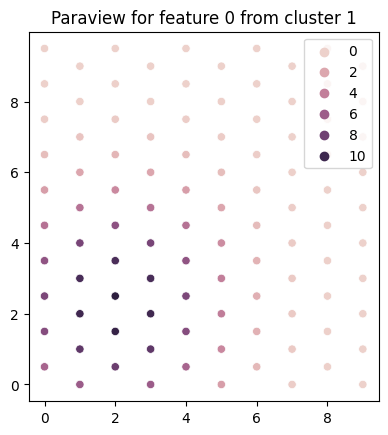

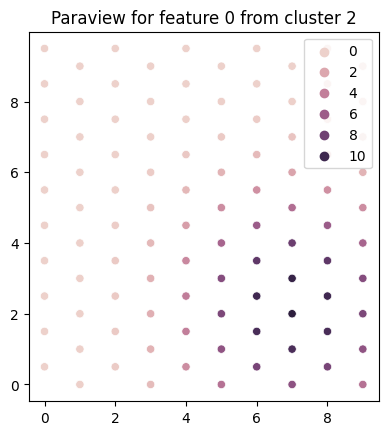

In [13]:
feature = 0
###
sns.scatterplot(x=adata.obsm["spatial"][:, 0], y=adata.obsm["spatial"][:, 1], hue=np.asarray(adata.X[:, feature].todense()).reshape(-1))
plt.gca().set_aspect('equal')
plt.title(f"Intraview for feature {feature}")
plt.show()
###
sns.scatterplot(x=adata.obsm["spatial"][:, 0], y=adata.obsm["spatial"][:, 1], hue=adata.obs["cluster"])
plt.gca().set_aspect('equal')
plt.title("Cluster membership")
plt.show()
###
for i in range(1, 3):
    sns.scatterplot(x=adata.obsm["spatial"][:, 0], y=adata.obsm["spatial"][:, 1], hue=np.asarray(paraview_grouped[str(i)].X[:, feature].todense()).reshape(-1))
    plt.gca().set_aspect('equal')
    plt.title(f"Paraview for feature {feature} from cluster {i}")
    plt.show()

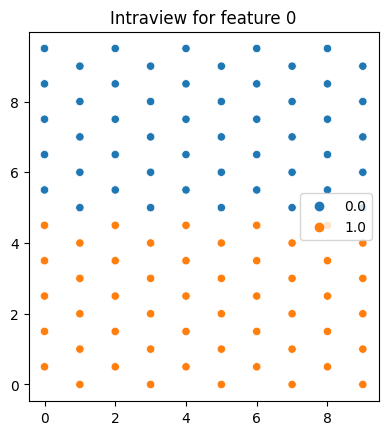

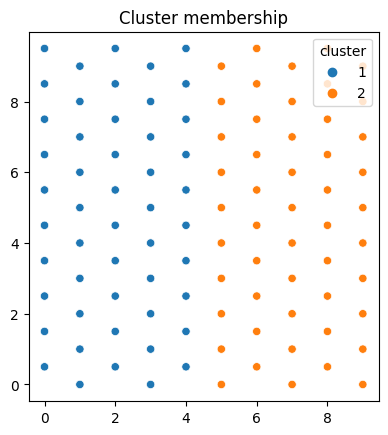

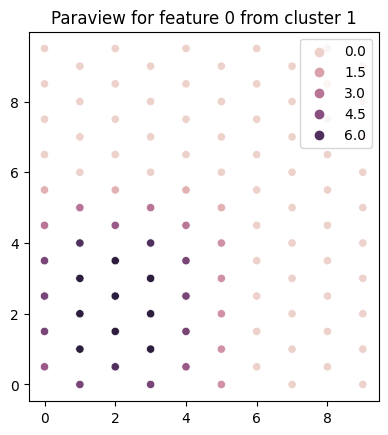

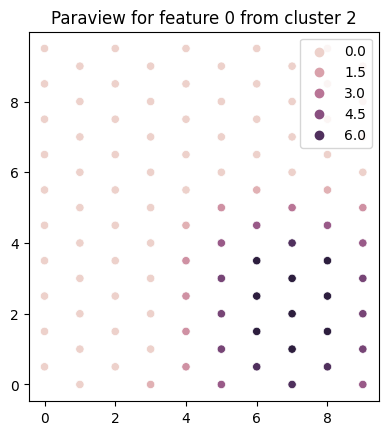

In [15]:
feature = 0
###
sns.scatterplot(x=adata.obsm["spatial"][:, 0], y=adata.obsm["spatial"][:, 1], hue=np.asarray(adata.X[:, feature].todense()).reshape(-1))
plt.gca().set_aspect('equal')
plt.title(f"Intraview for feature {feature}")
plt.show()
###
sns.scatterplot(x=adata.obsm["spatial"][:, 0], y=adata.obsm["spatial"][:, 1], hue=adata.obs["cluster"])
plt.gca().set_aspect('equal')
plt.title("Cluster membership")
plt.show()
###
for i in range(1, 3):
    sns.scatterplot(x=adata.obsm["spatial"][:, 0], y=adata.obsm["spatial"][:, 1], hue=np.asarray(juxtaview_groups[str(i)].X[:, feature].todense()).reshape(-1))
    plt.gca().set_aspect('equal')
    plt.title(f"Paraview for feature {feature} from cluster {i}")
    plt.show()